In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
train_dir = '/kaggle/input/private-datasetrar/224x224/train'
valid_dir = '/kaggle/input/private-datasetrar/224x224/valid'
test_dir = '/kaggle/input/private-datasetrar/224x224/test'

In [3]:
batch_size = 32
img_height, img_width = (224, 224)
input_shape = (224, 224, 3)
num_classes = 2
EPOCHS = 50

In [4]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 1593 images belonging to 2 classes.


In [6]:
valid_generator = train_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'
)

Found 457 images belonging to 2 classes.


In [7]:
test_generator = train_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'
)

Found 455 images belonging to 2 classes.


In [8]:
target_names = ['Diseased', 'Healthy']

Epoch 1
1/1 [==============================] - 0s 25ms/step


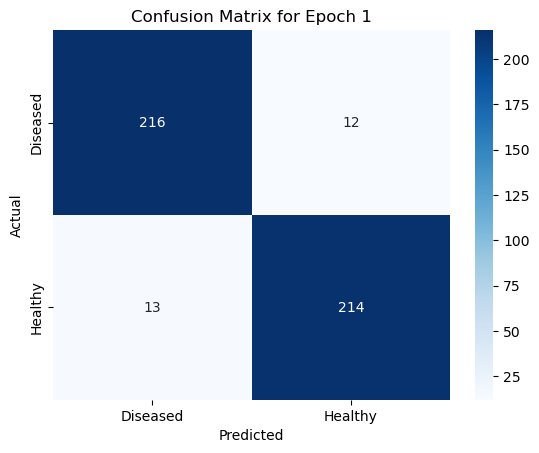

Test accuracy: 94.5054945054945
              precision    recall  f1-score   support

    Diseased       0.94      0.95      0.95       228
     Healthy       0.95      0.94      0.94       227

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455

-----------------------------------------------------
Epoch 2
1/1 [==============================] - 0s 23ms/step


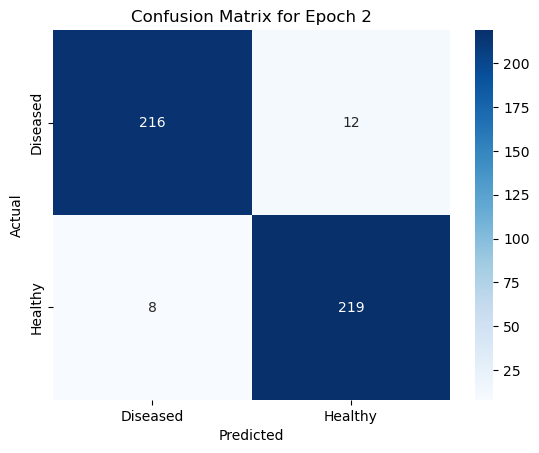

Test accuracy: 95.6043956043956
              precision    recall  f1-score   support

    Diseased       0.96      0.95      0.96       228
     Healthy       0.95      0.96      0.96       227

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455

-----------------------------------------------------
Epoch 3
1/1 [==============================] - 0s 22ms/step


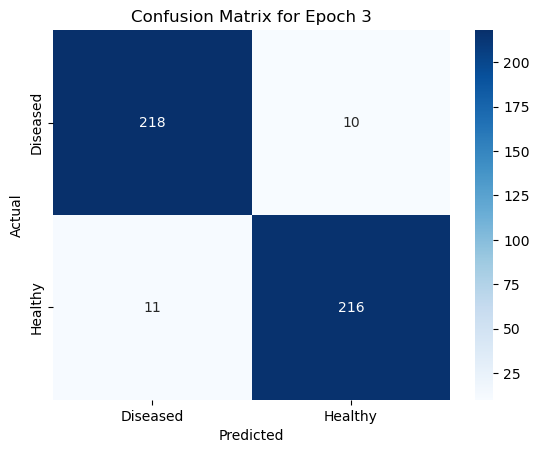

Test accuracy: 95.38461538461539
              precision    recall  f1-score   support

    Diseased       0.95      0.96      0.95       228
     Healthy       0.96      0.95      0.95       227

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455

-----------------------------------------------------
Epoch 4
1/1 [==============================] - 0s 33ms/step


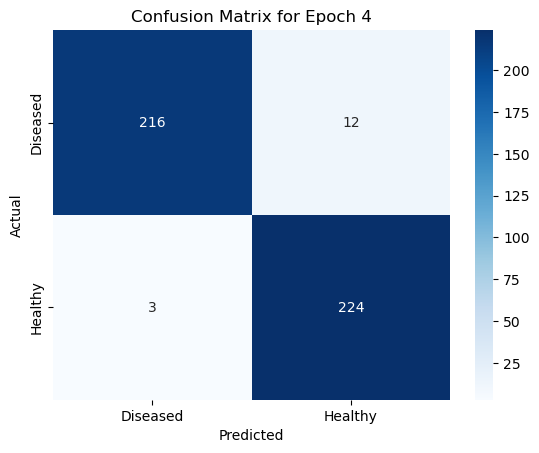

Test accuracy: 96.7032967032967
              precision    recall  f1-score   support

    Diseased       0.99      0.95      0.97       228
     Healthy       0.95      0.99      0.97       227

    accuracy                           0.97       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455

-----------------------------------------------------
Epoch 5
1/1 [==============================] - 0s 22ms/step


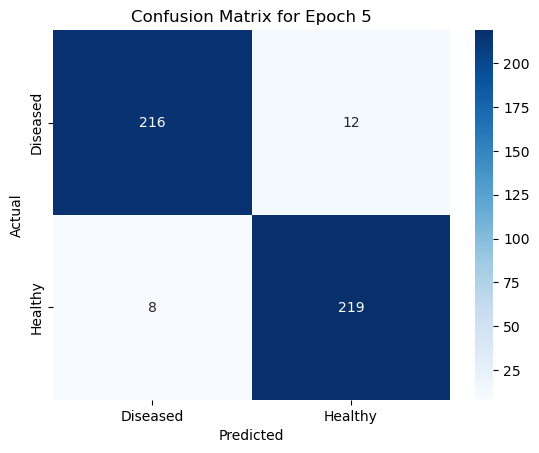

Test accuracy: 95.6043956043956
              precision    recall  f1-score   support

    Diseased       0.96      0.95      0.96       228
     Healthy       0.95      0.96      0.96       227

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455

-----------------------------------------------------


In [11]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import tensorflow as tf
saved_model_filepaths = [
    '/kaggle/input/mobilenetv3/MobilenetV3/50epoch.08-0.08.h5',
    '/kaggle/input/mobilenetv3/MobilenetV3/50epoch.12-0.06.h5',
    '/kaggle/input/mobilenetv3/MobilenetV3/50epoch.21-0.07.h5',
    '/kaggle/input/mobilenetv3/MobilenetV3/50epoch.30-0.08.h5',
    '/kaggle/input/mobilenetv3/MobilenetV3/50epoch.42-0.07.h5',
]

# Iterate over the saved model file paths
for epoch, model_filepath in enumerate(saved_model_filepaths, start=1):
    print("Epoch {}".format(epoch))
    
    # Load the model
    model = tf.keras.models.load_model(model_filepath)

    filenames = test_generator.filenames
    nb_samples = len(test_generator)

    y_prob = []
    y_act = []

    test_generator.reset()
    for _ in range(nb_samples):
        X_test, Y_test = test_generator.next()
        y_prob.append(model.predict(X_test))
        y_act.append(Y_test)

    predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
    actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

    out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class', 'actual_class'])

    confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

    sn.heatmap(confusion_matrix, cmap='Blues', annot=True, fmt='d')
    plt.title('Confusion Matrix for Epoch {}'.format(epoch))
    plt.show()

    print('Test accuracy: {}'.format((np.diagonal(confusion_matrix).sum() / confusion_matrix.sum().sum() * 100)))

    # Generate classification report
    classification_rep = classification_report(out_df['actual_class'], out_df['predicted_class'], target_names=target_names)
    print(classification_rep)
    print("-----------------------------------------------------")